In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

In [25]:

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    additional_stop_words = {"dog", "said", "fish","us","mr"} 
    stop_words.update(additional_stop_words)
    tokens = [word for word in tokens if word not in stop_words]
    # Combine tokens back into a single string
    return " ".join(tokens)


In [26]:
# Ladda ner NLTK-resurser
nltk.download("punkt")
nltk.download("stopwords")

# Läs in datasetet
data = pd.read_csv("TNM098-MC3-2011.csv", delimiter=";")

# Förbehandla innehållet i Content-kolumnen
data["Processed_Content"] = data["Content"].apply(preprocess_text)

# Definiera en lista med relevanta nyckelord
relevant_keywords = ["threat", "terrorism", "dead", "attack", "explosion", "bomb", "dangerous","airlines","police"]

# Filtrera datasetet baserat på nyckelorden i Processed_Content-kolumnen
filtered_data = data[data["Processed_Content"].str.contains("|".join(relevant_keywords))]

# Visa den filtrerade datasetet
# print(filtered_data.head())

# Skriv ut de fem första hela texterna
for index, row in filtered_data.head().iterrows():
    print("Hela texten för rapport", index + 1, ":")
    print(row["Content"])
    print("---------------------------------------------------------")



Hela texten för rapport 1 :
A group called Citizens for the Ethical Treatment of Lab Mice, believed by city officials to be connected to the Brotherhood of Antarctica, has been sending emails of a threatening nature to VastPress. It seems they are upset with the experiments applied to mice. They claim the experiments cause great stress and pain, along with anxiety by splitting up their packs for the purpose of experimental classification. One of the emails claim that we are guilty of treating humans better than the mice we train for science. We would like to pursue this thought but are unsure how to contact the leader in the group. The threats are rather strange, with the intent to ``free'' all mice in the city and use humans for experimental purposes.
---------------------------------------------------------
Hela texten för rapport 2 :
VastPress has recently received numerous threatening emails. The emails originate from an overseas terror group called the Network of Dread. The Networ

[nltk_data] Downloading package punkt to C:\Users\Vilma
[nltk_data]     Lundholm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vilma
[nltk_data]     Lundholm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


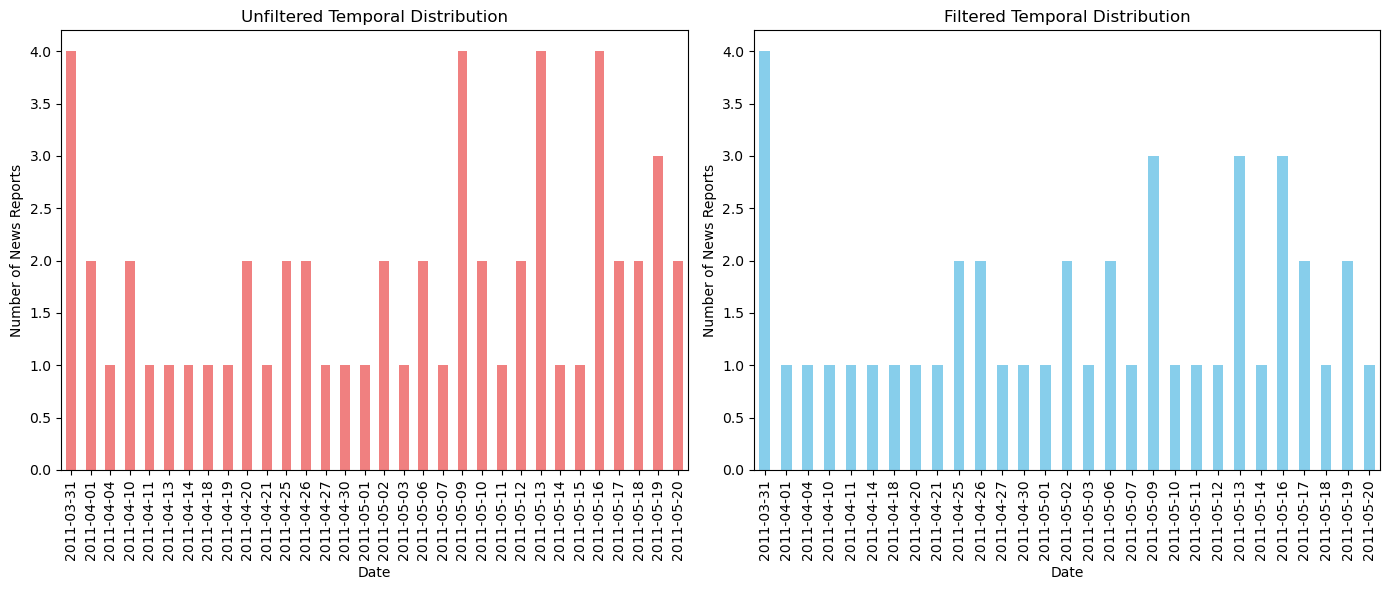

In [27]:
# Group by date and count the number of news reports for each date for both datasets
daily_counts_unfiltered = data.groupby(data['Date']).size()
daily_counts_filtered = pd.to_datetime(filtered_data['Date'])

# Gruppera efter datum och räkna antalet nyhetsrapporter för varje dag
daily_counts_filtered = filtered_data.groupby('Date').size()

# Plot the histograms side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
daily_counts_unfiltered.plot(kind='bar', color='lightcoral')
plt.title('Unfiltered Temporal Distribution')
plt.xlabel('Date')
plt.ylabel('Number of News Reports')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
daily_counts_filtered.plot(kind='bar', color='skyblue')
plt.title('Filtered Temporal Distribution')
plt.xlabel('Date')
plt.ylabel('Number of News Reports')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [28]:
# Displaya ämnesrelaterade ord
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print("Top words:", end=' ')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()


# Visualisera ämnen med WordCloud
def visualize_topics(model, feature_names, num_top_words):
    wordcloud_array=[]
    for topic_idx, topic in enumerate(model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        wordcloud_array.append(wordcloud)
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1} Word Cloud')
        plt.show()
    return wordcloud_array


Ämnen hittade via LDA:
Topic 1:
Top words: turman, patino, radioactive, report, professor, university, exercises, department, mayor, equipment

Topic 2:
Top words: investigators, crash, festival, source, stanley, police, officials, evidence, games, french

Topic 3:
Top words: mascot, police, man, team, damron, commission, old, systems, release, classified

Topic 4:
Top words: police, weapons, turkey, airlines, truck, antarctica, mice, city, food, flight

Topic 5:
Top words: games, obryan, thom, threats, mayor, press, dead, vast, officials, reported



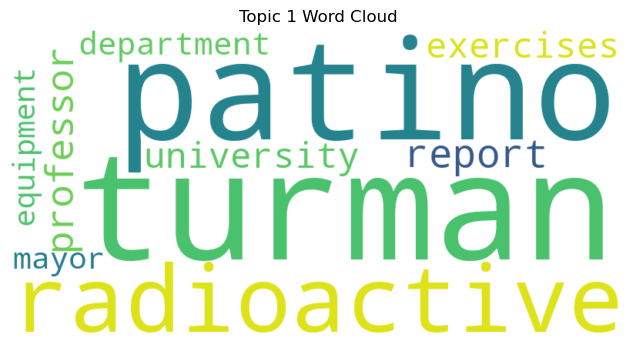

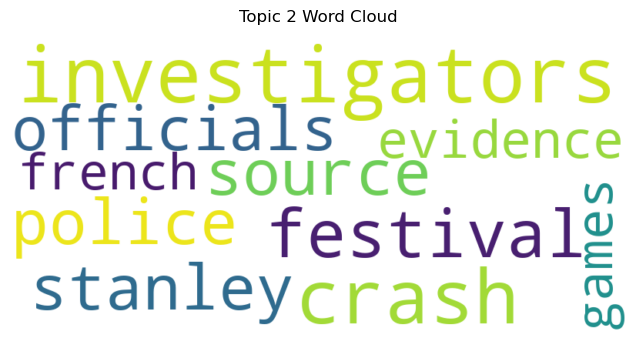

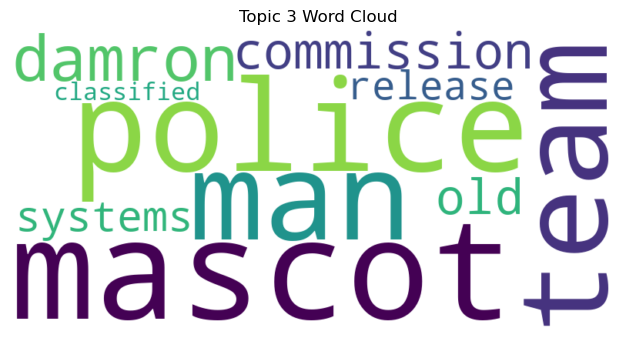

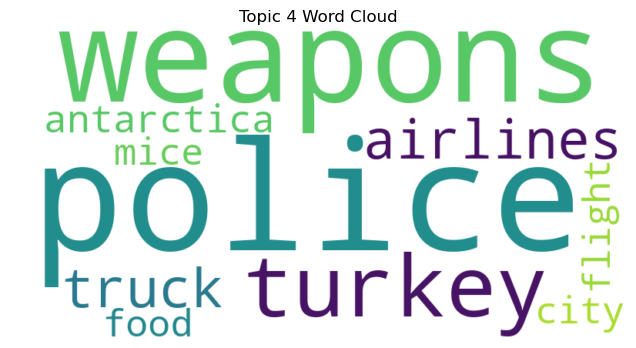

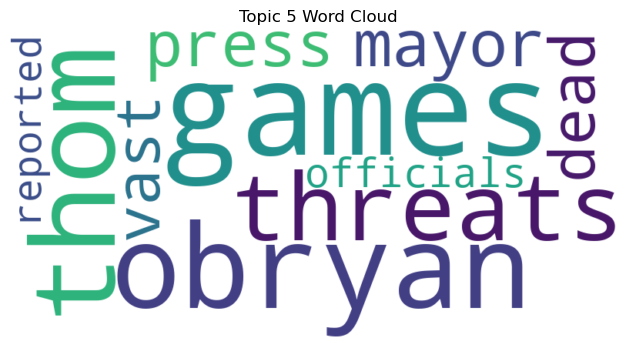

In [29]:
# Skapa en TF-IDF-matris
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['Processed_Content'])

# Bygg LDA-modell
num_topics = 5  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)


# Skriv ut ämnena och relaterade ord
print("Ämnen hittade via LDA:")
num_top_words = 10  
feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, num_top_words)


# Visualisera ämnen med WordCloud
wordcloud_array = visualize_topics(lda_model, feature_names, num_top_words)


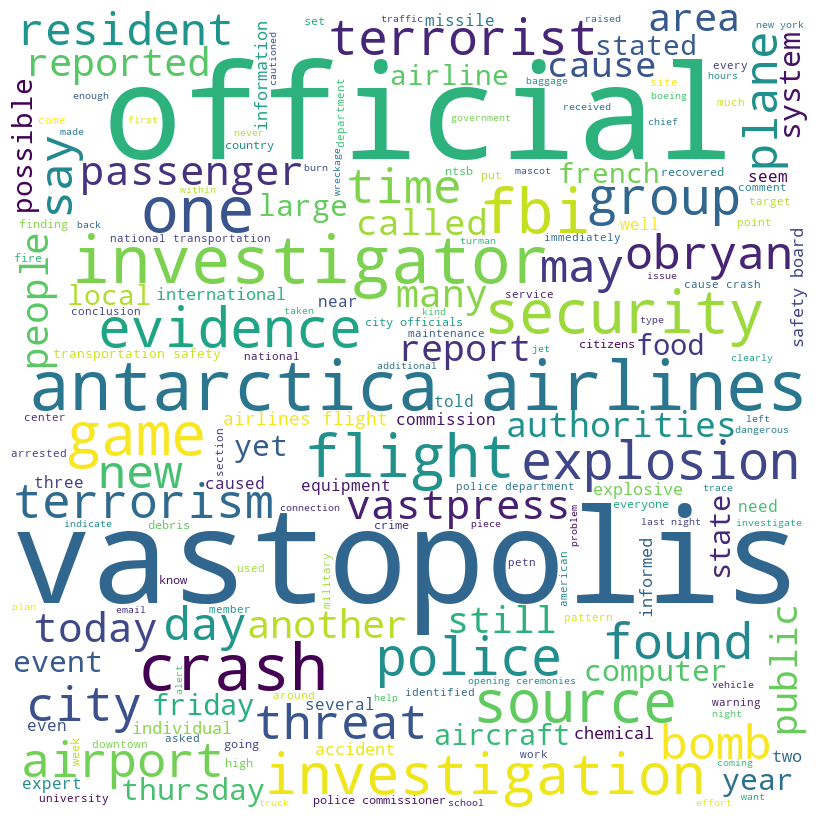

In [30]:
all_words = " ".join(data['Processed_Content'])

# Skapa en wordcloud med alla ord
wordcloud_fulldataset = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(all_words)

# Plotta wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fulldataset) 
plt.axis("off")
plt.tight_layout(pad = 0) 

plt.show() 

Word: officials, Timestamp: 2011-05-09
Word: threats, Timestamp: 2011-05-09
Word: reported, Timestamp: 2011-05-02
Word: obryan, Timestamp: 2011-05-13
Word: obryan, Timestamp: 2011-05-13
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: mayor, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: officials, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: officials, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: officials, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-31
Word: games, Timestamp: 2011-03-

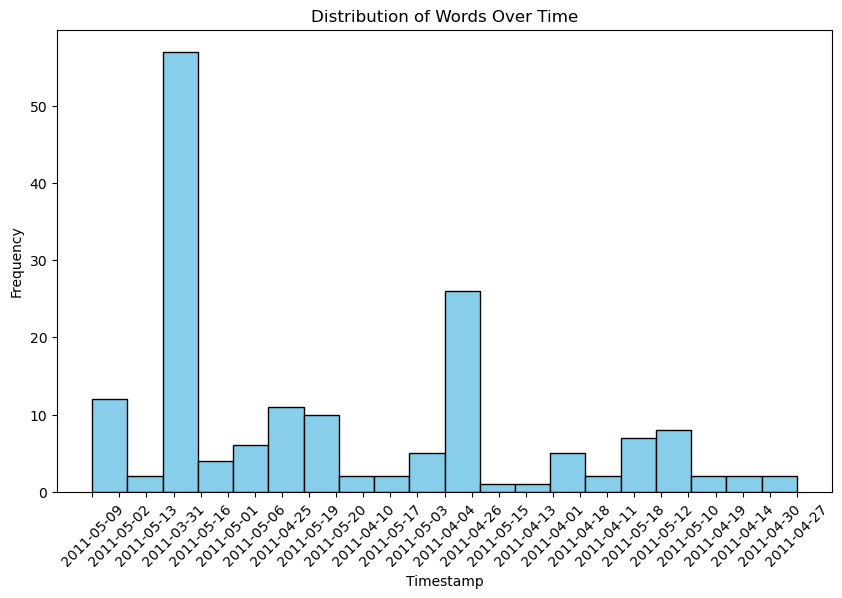

In [31]:
from collections import Counter

# Extrahera ord och deras frekvenser från wordclouden
word_freq_wordcloud = wordcloud_array.words_

# Skapa en Counter för att lagra ord och deras frekvenser från wordclouden
word_freq_counter = Counter(word_freq_wordcloud)

# Skapa en tom lista för att lagra timestamps för varje ord
word_timestamps = []

# Loopa igenom ditt ursprungliga dataset för att matcha ord med deras timestamps
for index, row in filtered_data.iterrows():
    content = row["Processed_Content"]
    for word in content.split():
        if word in word_freq_counter:
            # Om ordet finns i wordcloudens frekvenser, lagra dess timestamp
            word_timestamps.append((word, row["Date"]))

# Presentera resultaten
for word, timestamp in word_timestamps:
    print(f"Word: {word}, Timestamp: {timestamp}")

# Alternativt, du kan skapa en DataFrame med resultaten och presentera dem som en tabell
word_timestamps_df = pd.DataFrame(word_timestamps, columns=["Word", "Timestamp"])
print(word_timestamps_df.head())

# För att visualisera resultaten kan du t.ex. använda en histogram för att se distributionen av ord över tid
plt.figure(figsize=(10, 6))
plt.hist(word_timestamps_df["Timestamp"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Words Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
